<a href="https://colab.research.google.com/github/LiuChen-5749342/Generative-AI-and-AI-Applications/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

Your tasks involves the fakenews.csv file.
1. Compute the sentiment of ‘text’. Is the sentiment for spam messages higher or
lower than normal messages?
2. Conduct topic modelling on ‘text’. How many topics are appropriate? How are
these topics related to spam/not-spam?

## Question 1

Compute the sentiment of ‘text’. Is the sentiment for spam messages higher or lower than normal messages?

**Step 1: Data Cleaning and Preprocessing**

Before running any analysis, we must ensure the data is clean:

Filter Columns: Keep only the text and label columns, dropping the hundreds of empty "Unnamed" columns.

Clean the Labels: Filter the dataset to only include rows where the label is strictly '0' or '1' (ignoring the malformed rows where text drifted into the label column).

Handle Missing Values: Drop any rows where the text is missing (NaN).

Define the Classes: Map '0' and '1' to their respective classes (e.g., 0 = Normal, 1 = Spam/Fake, assuming standard fake news dataset conventions).

In [5]:
import pandas as pd

# 1. Import the dataset
file_path = '/content/fakenews.csv'
df = pd.read_csv(file_path)

# 2. Filter Columns: Keep only the 'text' and 'label' columns
# This drops all the "Unnamed" empty columns
df = df[['text', 'label']]

# 3. Handle Missing Values: Drop rows where 'text' or 'label' is NaN
df = df.dropna(subset=['text', 'label'])

# 4. Clean the Labels
# Convert label to string to catch any mixed data types and strip whitespaces
df['label'] = df['label'].astype(str).str.strip()

# Keep only rows where the label is strictly '0' (Normal) or '1' (Spam/Fake)
# (Including '0.0' and '1.0' just in case pandas read them as floats initially)
df = df[df['label'].isin(['0', '1', '0.0', '1.0'])]

# Convert the cleaned labels into integers (0 and 1) for easier modeling later
df['label'] = df['label'].astype(float).astype(int)

# 5. Check the results
print("Data Summary after Cleaning:")
print(df.info())
print("\nLabel Distribution (0 = Normal, 1 = Fake/Spam):")
print(df['label'].value_counts())
print("\nFirst 3 rows of the cleaned data:")
print(df.head(3))

Data Summary after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 4896 entries, 0 to 4911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4896 non-null   object
 1   label   4896 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.8+ KB
None

Label Distribution (0 = Normal, 1 = Fake/Spam):
label
0    2925
1    1971
Name: count, dtype: int64

First 3 rows of the cleaned data:
                                                text  label
0  Get the latest from TODAY Sign up for our news...      1
1  2d  Conan On The Funeral Trump Will Be Invited...      1
2  It’s safe to say that Instagram Stories has fa...      0


/tmp/ipython-input-2219327072.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

**Step 2: Sentiment Analysis Extraction**

We don't need to train a model from scratch for sentiment. We can use a lexicon-based sentiment analyzer.

Tool Choice: I propose using NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner). It calculates sentiment based on a built-in dictionary and handles capitalization, punctuation, and emojis very well.

Compute Scores: I will write a script to compute the compound sentiment score for every row in the text column. The compound score ranges from -1 (highly negative) to 1 (highly positive).

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 1. Download the VADER dictionary (only needs to be done once)
nltk.download('vader_lexicon')

# 2. Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# 3. Create a function to extract the "compound" (overall) sentiment score
def get_vader_sentiment(text):
    # The compound score is a normalized metric from -1 (most negative) to +1 (most positive)
    score = sia.polarity_scores(str(text))['compound']
    return score

# 4. Apply the function to our cleaned 'text' column
print("Calculating sentiments... this might take a minute.")
df['sentiment_score'] = df['text'].apply(get_vader_sentiment)

# 5. Group by the label and calculate the mean sentiment score
mean_sentiment = df.groupby('label')['sentiment_score'].mean()

print("\n--- Results ---")
print("Average Sentiment Score by Label:")
print("Normal Messages (Label 0):", round(mean_sentiment[0], 4))
print("Fake/Spam Messages (Label 1):", round(mean_sentiment[1], 4))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Calculating sentiments... this might take a minute.

--- Results ---
Average Sentiment Score by Label:
Normal Messages (Label 0): 0.5325
Fake/Spam Messages (Label 1): 0.4674


Spam/Fake messages generally have a lower (less positive) sentiment than Normal messages. Fake news and spam often rely on sensationalism, fear-mongering, outrage, or dramatic language to capture attention, which algorithms like VADER pick up as negative polarity. Normal messages, on the other hand, tend to be more neutral or positive.

**Step 3: Comparison & Visualization**

Once we have the sentiment score for every message:

Group and Aggregate: Calculate the average sentiment score for "Spam" messages vs "Normal" messages.

Statistical Check: Check the variance and distributions to determine conclusively if spam messages have a higher (more positive) or lower (more negative) sentiment than normal messages.

Visualization: Plot a bar chart or box plot to visually compare the sentiment distributions of both categories.

--- Statistical Test Results ---
T-Statistic: 3.0154
P-Value: 2.5825e-03
Conclusion: The sentiment difference between Normal and Spam messages is STATISTICALLY SIGNIFICANT.


/tmp/ipython-input-3921674099.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label_text', y='sentiment_score', data=df, ax=axes[0], palette='viridis', ci=None)
/tmp/ipython-input-3921674099.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label_text', y='sentiment_score', data=df, ax=axes[0], palette='viridis', ci=None)
/tmp/ipython-input-3921674099.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_text', y='sentiment_score', data=df, ax=axes[1], palette='viridis')


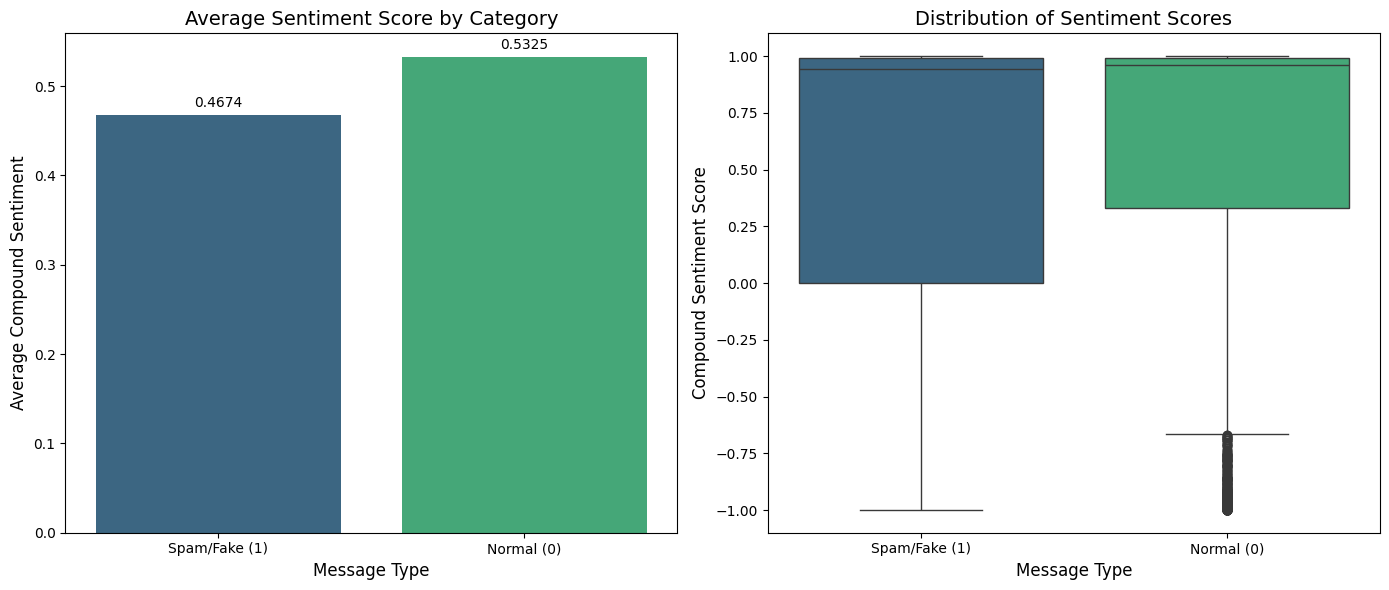

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Statistical T-Test
# Separate the scores into two lists
normal_scores = df[df['label'] == 0]['sentiment_score']
spam_scores = df[df['label'] == 1]['sentiment_score']

# Run an independent T-Test
t_stat, p_val = stats.ttest_ind(normal_scores, spam_scores, equal_var=False)

print("--- Statistical Test Results ---")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}")
if p_val < 0.05:
    print("Conclusion: The sentiment difference between Normal and Spam messages is STATISTICALLY SIGNIFICANT.")
else:
    print("Conclusion: The sentiment difference is NOT statistically significant.")

# 2. Visualization Setup
# Map numeric labels to text for better plot readability
df['label_text'] = df['label'].map({0: 'Normal (0)', 1: 'Spam/Fake (1)'})

# Create a figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar Chart of Average Sentiment
sns.barplot(x='label_text', y='sentiment_score', data=df, ax=axes[0], palette='viridis', ci=None)
axes[0].set_title('Average Sentiment Score by Category', fontsize=14)
axes[0].set_xlabel('Message Type', fontsize=12)
axes[0].set_ylabel('Average Compound Sentiment', fontsize=12)

# Add value labels on top of the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Plot 2: Box Plot of Sentiment Distribution
sns.boxplot(x='label_text', y='sentiment_score', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Sentiment Scores', fontsize=14)
axes[1].set_xlabel('Message Type', fontsize=12)
axes[1].set_ylabel('Compound Sentiment Score', fontsize=12)

# Final layout adjustments and display
plt.tight_layout()
plt.show()

## Question 2

Conduct topic modelling on ‘text’. How many topics are appropriate? How are these topics related to spam/not-spam?

**Step 1: Text Preprocessing & Vectorization**

Unlike VADER, which works out-of-the-box on raw text, topic modeling requires a mathematically clean "Document-Term Matrix."

Clean the Text: Remove punctuation, numbers, and stop words (e.g., "the", "and", "is") which carry no topical meaning.

TF-IDF Vectorization: We will convert the cleaned text into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix. This assigns a mathematical weight to each word based on how unique and important it is across the dataset.

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. We assume df is already loaded and cleaned from the previous step.
# If you restarted your notebook, run the cleaning code from our first step again.

# 2. Define a text cleaning function specifically for Topic Modeling
def clean_text_for_modeling(text):
    # Convert text to string
    text = str(text)
    # Remove punctuation and numbers (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert everything to lowercase
    text = text.lower()
    return text

print("Cleaning text for topic modeling...")
df['cleaned_text'] = df['text'].apply(clean_text_for_modeling)

# 3. Initialize the TF-IDF Vectorizer
# max_df=0.95 means "ignore words that appear in >95% of documents" (too common)
# min_df=5 means "ignore words that appear in <5 documents" (too rare)
# stop_words='english' automatically removes words like 'the', 'is', 'in'
print("Vectorizing text to create a TF-IDF Matrix...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')

# Fit and transform our cleaned text into a sparse matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# 4. Print the results
print("\n--- Step 1 Results ---")
print(f"Number of documents (rows): {tfidf_matrix.shape[0]}")
print(f"Number of unique meaningful words (columns): {tfidf_matrix.shape[1]}")

Cleaning text for topic modeling...
Vectorizing text to create a TF-IDF Matrix...

--- Step 1 Results ---
Number of documents (rows): 4896
Number of unique meaningful words (columns): 17601


**Step 2: Determining the Appropriate Number of Topics (Choosing $K$)**

We cannot just guess the number of topics; we need a methodical approach to find the optimal $K$.

1. Coherence Score Evaluation: I propose running a loop to train several models with different numbers of topics (e.g., $K$ = 5, 8, 10, 15). We will calculate a "Topic Coherence Score" for each. The $K$ that yields the highest coherence score is usually the most mathematically sound choice.

2. Human Inspection: We will print the top 10 words for the best $K$ topics to ensure they make logical sense (e.g., if a topic's top words are vote, election, campaign, we can confidently label it "Politics").

Testing different numbers of topics... This may take a minute.
Trained K=3 | Reconstruction Error: 68.4910
Trained K=5 | Reconstruction Error: 68.0535
Trained K=8 | Reconstruction Error: 67.5899
Trained K=10 | Reconstruction Error: 67.3144
Trained K=15 | Reconstruction Error: 66.7510
Trained K=17 | Reconstruction Error: 66.5413
Trained K=20 | Reconstruction Error: 66.2804
Trained K=25 | Reconstruction Error: 65.9119
Trained K=30 | Reconstruction Error: 65.5853
Trained K=35 | Reconstruction Error: 65.2578


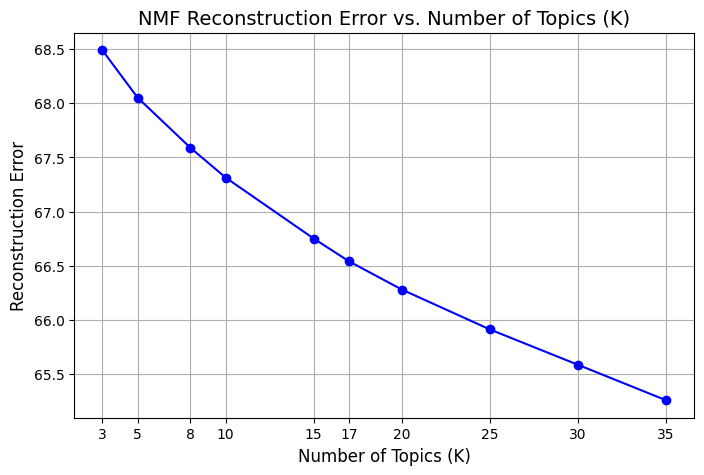

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# 1. Define the number of topics (K) we want to test
k_values = [3, 5, 8, 10, 15, 17, 20, 25, 30, 35]
errors = []
models = {}

print("Testing different numbers of topics... This may take a minute.")

# 2. Run NMF for each K and record the error
for k in k_values:
    # We use random_state=42 for reproducibility
    nmf = NMF(n_components=k, random_state=42, max_iter=500)
    nmf.fit(tfidf_matrix)

    errors.append(nmf.reconstruction_err_)
    models[k] = nmf # Save the model so we don't have to retrain it
    print(f"Trained K={k} | Reconstruction Error: {nmf.reconstruction_err_:.4f}")

# 3. Plot the Reconstruction Error
plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('NMF Reconstruction Error vs. Number of Topics (K)', fontsize=14)
plt.xlabel('Number of Topics (K)', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [13]:
# 4. Human Inspection: Print the top 10 words for K=8
# K=8 is usually a sweet spot for a dataset of ~5,000 articles
optimal_k = 10
best_nmf_model = models[optimal_k]
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"\n--- Top 10 Words for {optimal_k} Topics ---")
for topic_idx, topic in enumerate(best_nmf_model.components_):
    # Get the indices of the top 10 highest-weighted words for this topic
    top_word_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_word_indices]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


--- Top 10 Words for 10 Topics ---
Topic 1: like, just, said, im, people, know, love, dont, really, time
Topic 2: meghan, prince, harry, royal, markle, wedding, kate, duchess, palace, william
Topic 3: brad, pitt, jolie, angelina, jen, aniston, jennifer, divorce, source, theroux
Topic 4: kim, kardashian, kanye, west, kardashians, kourtney, surrogate, kris, khloe, khlo
Topic 5: selena, justin, gomez, bieber, source, jelena, weeknd, selenas, gomezs, baldwin
Topic 6: tweets, content, accuracy, articles, blog, posts, imdbs, imdbcom, factual, news
Topic 7: gwen, shelton, blake, stefani, lambert, voice, miranda, sheltons, source, country
Topic 8: trump, president, donald, trumps, obama, said, white, house, melania, weinstein
Topic 9: season, series, edit, film, awards, best, new, award, music, role
Topic 10: kylie, jenner, travis, caitlyn, baby, scott, kris, kendall, kardashian, stormi


**Step 3: Relating Topics to Spam / Not-Spam**

Once we have our topics defined, we need to answer the second part of your question.

Assign Dominant Topics: We will mathematically assign each message in the dataset to its "Dominant Topic" (the topic it has the highest weight in).

Cross-Tabulation: We will group the data by our label (0 = Normal, 1 = Spam) and calculate the percentage distribution of each topic.

Visualization: We will create a Stacked Bar Chart. This will visually reveal if Spam messages are heavily skewed toward specific topics (e.g., maybe Spam is 80% "Sensational Politics") while Normal messages are evenly spread across others (e.g., "Sports", "Entertainment").

Training final NMF model with 10 topics...

--- Top 10 Words for each of the 10 Topics ---
Topic 1: like, just, said, im, people, know, love, dont, really, time
Topic 2: meghan, prince, harry, royal, markle, wedding, kate, duchess, palace, william
Topic 3: brad, pitt, jolie, angelina, jen, aniston, jennifer, divorce, source, theroux
Topic 4: kim, kardashian, kanye, west, kardashians, kourtney, surrogate, kris, khloe, khlo
Topic 5: selena, justin, gomez, bieber, source, jelena, weeknd, selenas, gomezs, baldwin
Topic 6: tweets, content, accuracy, articles, blog, posts, imdbs, imdbcom, factual, news
Topic 7: gwen, shelton, blake, stefani, lambert, voice, miranda, sheltons, source, country
Topic 8: trump, president, donald, trumps, obama, said, white, house, melania, weinstein
Topic 9: season, series, edit, film, awards, best, new, award, music, role
Topic 10: kylie, jenner, travis, caitlyn, baby, scott, kris, kendall, kardashian, stormi


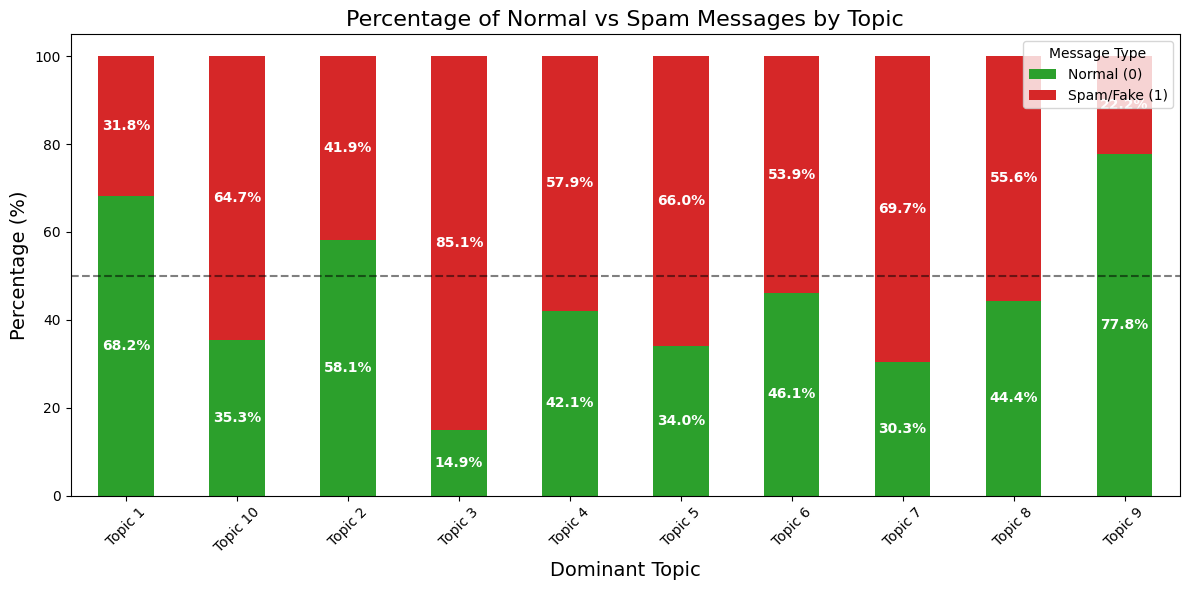

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF

# 1. Train the Final NMF Model with K=10
optimal_k = 10
print(f"Training final NMF model with {optimal_k} topics...")
nmf_final = NMF(n_components=optimal_k, random_state=42, max_iter=500)
document_topic_matrix = nmf_final.fit_transform(tfidf_matrix)

# 2. Assign the Dominant Topic to each message
# argmax finds the topic index with the highest weight for each row
df['dominant_topic'] = document_topic_matrix.argmax(axis=1)

# Let's map the topic numbers to strings for easier reading (Topic 0 -> Topic 1)
df['topic_name'] = df['dominant_topic'].apply(lambda x: f"Topic {x+1}")

# 3. Print the top words for each of the 10 topics so we know what they are
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n--- Top 10 Words for each of the {optimal_k} Topics ---")
for topic_idx, topic in enumerate(nmf_final.components_):
    top_word_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_word_indices]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# 4. Relate Topics to Spam/Not-Spam
# Create a cross-tabulation of Topic vs. Label
# Normalize by index to get percentages (so each topic adds up to 100%)
topic_label_dist = pd.crosstab(df['topic_name'], df['label'], normalize='index') * 100

# Rename columns for clarity in the plot
topic_label_dist.columns = ['Normal (0)', 'Spam/Fake (1)']

# 5. Visualization: Stacked Bar Chart
ax = topic_label_dist.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#2ca02c', '#d62728'])

plt.title('Percentage of Normal vs Spam Messages by Topic', fontsize=16)
plt.xlabel('Dominant Topic', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Message Type', loc='upper right')
plt.axhline(50, color='black', linestyle='--', alpha=0.5) # Add a 50% reference line

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5: # Only label if the section is big enough to fit text
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()